Importing required libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Manipulation

In [7]:
total_male_customers = df[df['gender'] == 'Male'].shape[0]

In [8]:
print(total_male_customers)

3549


In [9]:
total_DSL = df[df['InternetService'] == 'DSL'].shape[0]

In [10]:
print(total_DSL)

2416


In [11]:
New_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]

In [12]:
new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]

## Data Visualization

In [13]:
churn_counts = df['Churn'].value_counts()

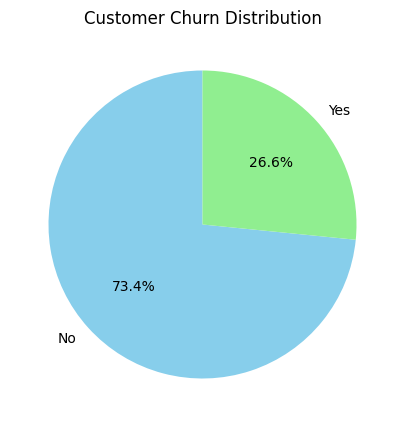

In [14]:
plt.figure(figsize=(5,5))
plt.pie(churn_counts,labels=churn_counts.index,autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Customer Churn Distribution')
plt.show()

In [15]:
internet_counts = df['InternetService'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_14648\3229273743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=internet_counts.index, y=internet_counts, palette="muted")


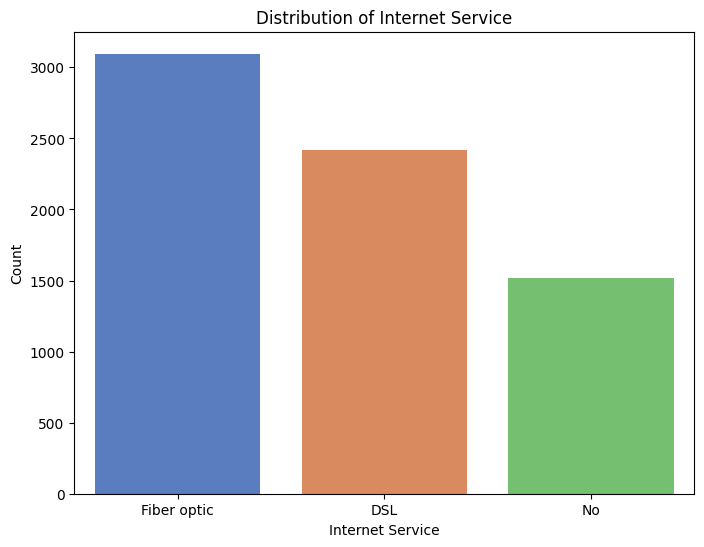

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x=internet_counts.index, y=internet_counts, palette="muted")
plt.title('Distribution of Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

## Model Building

Building a sequential model using Keras, to find out if the customer would churn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
i.
The visible/input layer would have 12 nodes with ‘Relu’ as activation function.
ii.
This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii.
Using ‘Adam’ as the optimization algorithm 
iv.
Fit the model on the train set, with number of epochs to be 150
v.
Predicted the values on the test set and build a confusion matrix 
vi.
Plot the ‘Accuracy vs Epochs’ graph

In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [18]:
X = df[['tenure']].values
y = pd.get_dummies(df['Churn'], drop_first=True).values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
563/563 [==============================] - 11s 6ms/step - loss: 0.5292 - accuracy: 0.7575
Epoch 2/150
563/563 [==============================] - 2s 4ms/step - loss: 0.5143 - accuracy: 0.7534
Epoch 3/150
563/563 [==============================] - 2s 4ms/step - loss: 0.5136 - accuracy: 0.7479
Epoch 4/150
563/563 [==============================] - 2s 3ms/step - loss: 0.5140 - accuracy: 0.7438
Epoch 5/150
563/563 [==============================] - 2s 4ms/step - loss: 0.5165 - accuracy: 0.7470
Epoch 6/150
563/563 [==============================] - 2s 4ms/step - loss: 0.5152 - accuracy: 0.7374
Epoch 7/150
563/563 [==============================] - 2s 4ms/step - loss: 0.5145 - accuracy: 0.7470
Epoch 8/150
563/563 [==============================] - 2s 4ms/step - loss: 0.5134 - accuracy: 0.7422
Epoch 9/150
563/563 [==============================] - 2s 4ms/step - loss: 0.5141 - accuracy: 0.7436
Epoch 10/150
563/563 [==============================] - 2s 4ms/step - loss: 0.5154 - accur

In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

44/44 [==============================] - 0s 4ms/step


In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[943  90]
 [248 126]]


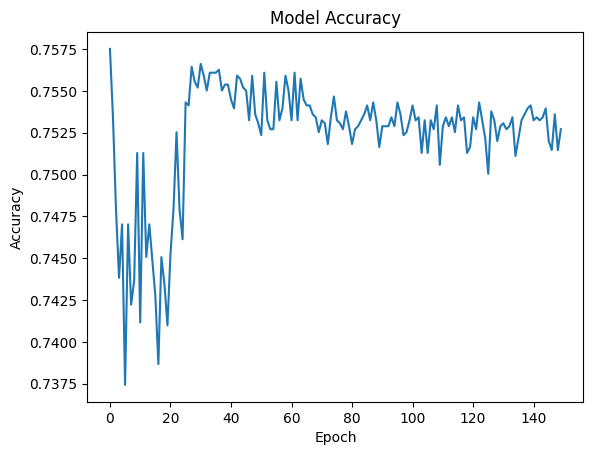

In [25]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Second Model

Build the 2nd model using same target and feature variables: 
i.
Added a drop-out layer after the input layer with drop-out value of 0.3 
ii.
Added a drop-out layer after the hidden layer with drop-out value of 0.2 
iii.
Predicted the values on the test set and build a confusion matrix 
iv.
Plot the ‘Accuracy vs Epochs’ graph

In [28]:
model2 = Sequential()
model2.add(Dense(12, input_dim=1, activation='relu'))
model2.add(Dropout(0.3))  
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.2))  
model2.add(Dense(1, activation='sigmoid'))

In [29]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
563/563 [==============================] - 3s 4ms/step - loss: 0.9463 - accuracy: 0.6880
Epoch 2/50
563/563 [==============================] - 2s 3ms/step - loss: 0.5703 - accuracy: 0.7246
Epoch 3/50
563/563 [==============================] - 2s 4ms/step - loss: 0.5412 - accuracy: 0.7307
Epoch 4/50
563/563 [==============================] - 2s 4ms/step - loss: 0.5314 - accuracy: 0.7333
Epoch 5/50
563/563 [==============================] - 2s 4ms/step - loss: 0.5307 - accuracy: 0.7342
Epoch 6/50
563/563 [==============================] - 2s 4ms/step - loss: 0.5277 - accuracy: 0.7340
Epoch 7/50
563/563 [==============================] - 2s 4ms/step - loss: 0.5269 - accuracy: 0.7342
Epoch 8/50
563/563 [==============================] - 2s 4ms/step - loss: 0.5290 - accuracy: 0.7342
Epoch 9/50
563/563 [==============================] - 2s 3ms/step - loss: 0.5269 - accuracy: 0.7342
Epoch 10/50
563/563 [==============================] - 2s 3ms/step - loss: 0.5246 - accuracy: 0.7342

In [31]:
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

44/44 [==============================] - 0s 4ms/step


In [32]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[1033    0]
 [ 374    0]]


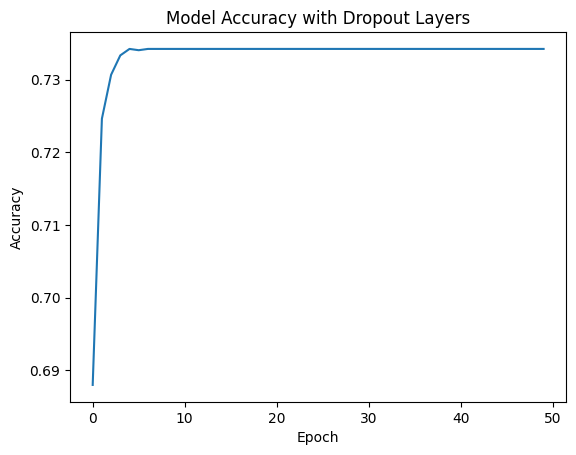

In [33]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy with Dropout Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Third Model

Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and 
‘Churn’ as the dependent/target column: 
i.
The visible/input layer has 12 nodes with ‘Relu’ as activation function.
ii.
This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii.
Used ‘Adam’ as the optimization algorithm
iv.
Fit the model on the train set, with number of epochs to be 150 
v.
Predicted the values on the test set and build a confusion matrix 
vi. 
Plot the accuracy vs. epochs graph

In [34]:
model3 = Sequential()
model3.add(Dense(12, input_dim=3, activation='relu')) 
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [36]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].values
y = pd.get_dummies(df['Churn'], drop_first=True).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history3 = model3.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
563/563 [==============================] - 3s 4ms/step - loss: 44.7549 - accuracy: 0.6279
Epoch 2/150
563/563 [==============================] - 2s 3ms/step - loss: 1.5283 - accuracy: 0.7138
Epoch 3/150
563/563 [==============================] - 2s 4ms/step - loss: 1.1654 - accuracy: 0.7285
Epoch 4/150
563/563 [==============================] - 2s 4ms/step - loss: 1.3104 - accuracy: 0.7209
Epoch 5/150
563/563 [==============================] - 3s 5ms/step - loss: 1.1474 - accuracy: 0.7317
Epoch 6/150
563/563 [==============================] - 3s 5ms/step - loss: 1.3006 - accuracy: 0.7349
Epoch 7/150
563/563 [==============================] - 2s 4ms/step - loss: 1.2748 - accuracy: 0.7285
Epoch 8/150
563/563 [==============================] - 2s 4ms/step - loss: 1.5497 - accuracy: 0.7321
Epoch 9/150
563/563 [==============================] - 2s 4ms/step - loss: 1.1670 - accuracy: 0.7380
Epoch 10/150
563/563 [==============================] - 2s 4ms/step - loss: 1.2110 - accur

In [39]:
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)

44/44 [==============================] - 0s 3ms/step


In [40]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[879 154]
 [172 202]]


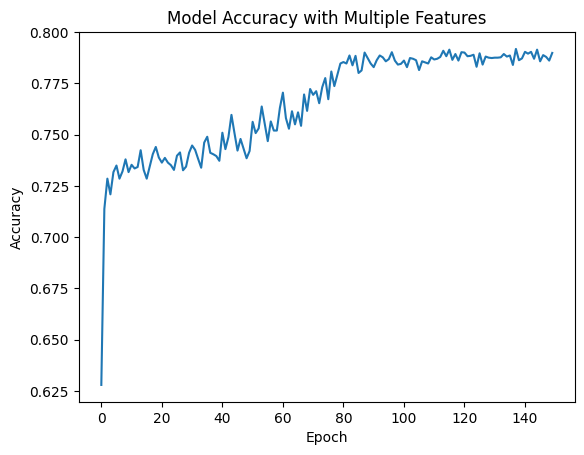

In [41]:
plt.plot(history3.history['accuracy'])
plt.title('Model Accuracy with Multiple Features')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

We noticed that the accuracy is better with increased number of independent features